In [2]:
%matplotlib inline
import numpy as np

# Simulating a Qubit

In [3]:
zero_qubit=np.matrix('1; 0')
one_qubit=np.matrix('0; 1')
print(zero_qubit)
print(one_qubit)

[[1]
 [0]]
[[0]
 [1]]


In [35]:
def zero_to_one_qubit(percentage_zero,percentage_one):
     if not percentage_zero+percentage_one==100 or percentage_zero<0 or percentage_one<0: raise Exception("percentages must add up to 100\% and both be positive ")
     return np.sqrt(percentage_zero/100.)*zero_qubit+np.sqrt(percentage_one/100.)*one_qubit
print(zero_to_one_qubit(100,0))

[[1.]
 [0.]]


In [5]:
fifty_fifty_qubit=zero_to_one_qubit(50,50)
ten_ninety_qubit=zero_to_one_qubit(10,90)
print("fifty_fifty",fifty_fifty_qubit)
print("ten_ninety",ten_ninety_qubit)

fifty_fifty [[0.70710678]
 [0.70710678]]
ten_ninety [[0.31622777]
 [0.9486833 ]]


# Three Different Representations of Qubits

In [6]:
def qubit(percentage_first,percentage_second,basis_first,basis_second):
    if not percentage_first+percentage_second==100 or percentage_first<0 or percentage_second<0: raise Exception("percentages must add up to 100\% and both be positive ")
    return sqrt(percentage_first/100.)*basis_first+sqrt(percentage_second/100.)*basis_second

In [7]:
plus_qubit=1/np.sqrt(2)*np.matrix('1; 1')
minus_qubit=1/np.sqrt(2)*np.matrix('1; -1')

In [8]:
clockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[np.complex(0,1)]])    
counterclockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[-np.complex(0,1)]])
print(clockwisearrow_qubit)
print(counterclockwisearrow_qubit)

[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]


# The Bloch Sphere

In [9]:
def get_bloch_coordinates(qubit):
    def get_x_bloch(qubit):
        qubit_x_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*qubit 
        prob_zero_qubit=(qubit_x_basis.item(0)*qubit_x_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_x_basis.item(1)*qubit_x_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
        
    def get_y_bloch(qubit):
        qubit_y_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*np.matrix([[1,0],[0,-np.complex(0,1)]])*qubit
        prob_zero_qubit=(qubit_y_basis.item(0)*qubit_y_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_y_basis.item(1)*qubit_y_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    
    def get_z_bloch(qubit):
        qubit_z_basis=qubit
        prob_zero_qubit=(qubit_z_basis.item(0)*qubit_z_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_z_basis.item(1)*qubit_z_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    return (get_x_bloch(qubit),get_y_bloch(qubit),get_z_bloch(qubit))

In [10]:
print('|"0"> coordinates are:',get_bloch_coordinates(zero_qubit))
print('|"1"> coordinates are:',get_bloch_coordinates(one_qubit))
print('|"+"> coordinates are:',get_bloch_coordinates(plus_qubit))
print('|"-"> coordinates are:',get_bloch_coordinates(minus_qubit))
print('|"↻"> coordinates are:',get_bloch_coordinates(clockwisearrow_qubit))
print('|"↺"> coordinates are:',get_bloch_coordinates(counterclockwisearrow_qubit))

|"0"> coordinates are: (0.0, 0.0, 1)
|"1"> coordinates are: (0.0, 0.0, -1)
|"+"> coordinates are: (0.9999999999999996, 0.0, 0.0)
|"-"> coordinates are: (-0.9999999999999996, 0.0, 0.0)
|"↻"> coordinates are: (0.0, 0.9999999999999996, 0.0)
|"↺"> coordinates are: (0.0, -0.9999999999999996, 0.0)


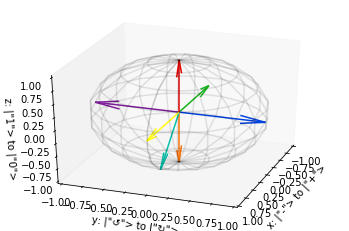

In [11]:
def plot_bloch(qubit,color='b',ax=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # draw sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color="k",alpha=.1)
        ax.grid(False)

    coordinates=get_bloch_coordinates(qubit)
    ax.quiver([0],[0],[0],[coordinates[0]],[coordinates[1]],[coordinates[2]],length=1,color=color,arrow_length_ratio=0.3)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xlabel('x: |"-"> to |"+">')
    ax.set_ylabel('y: |"↺"> to |"↻">')
    ax.set_zlabel('z: |"1"> to |"0">')
    ax.view_init(azim=20)
    return ax

# Plotting all of our basis qubits, colors and orientation match the textbook figure
ax=plot_bloch(zero_qubit,color='xkcd:red')
plot_bloch(one_qubit,color='xkcd:orange',ax=ax)
plot_bloch(plus_qubit,color='xkcd:yellow',ax=ax)
plot_bloch(minus_qubit,color='xkcd:green',ax=ax)
plot_bloch(clockwisearrow_qubit,color='xkcd:blue',ax=ax)
plot_bloch(counterclockwisearrow_qubit,color='xkcd:purple',ax=ax)

# Now plotting a qubit that is 10% |"0"> and 90% |"1"> in turquoise
plot_bloch(zero_to_one_qubit(10,90),color="xkcd:turquoise",ax=ax)



# Measuring a qubit on the Bloch Sphere

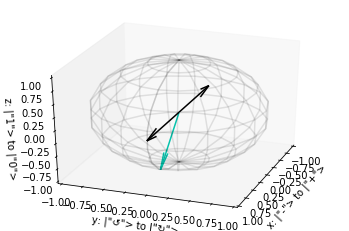

In [59]:
ax=plot_bloch(plus_qubit,color='xkcd:black')
plot_bloch(minus_qubit,color='xkcd:black',ax=ax)
plot_bloch(ten_ninety_qubit,color="xkcd:turquoise",ax=ax)

In [23]:
def qubit_to_percentages(qubit):
    zero = 100*qubit.item(0)*qubit.item(0)
    one = 100*qubit.item(1)*qubit.item(1)
    return (zero,one)
print(qubit_to_percentages(zero_qubit))
print(qubit_to_percentages(ten_ninety_qubit))
print(np.complex(0,1)
    

(100, 0)
(10.0, 89.99999999999999)
1j


In [57]:
clockwisearrow_zero_one = 1/np.sqrt(2)*np.matrix([[1],[np.complex(0,1)]])
print(clockwisearrow_qubit == (clockwisearrow_zero_one))

[[ True]
 [ True]]


[[0.70710678]
 [0.70710678]]
[[ 0.70710678]
 [-0.70710678]]
[[-0.70710678]
 [ 0.70710678]]
[[-0.70710678]
 [-0.70710678]]


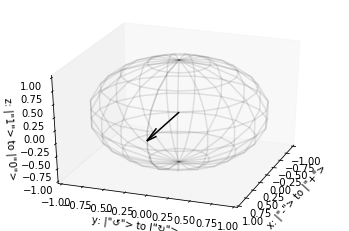

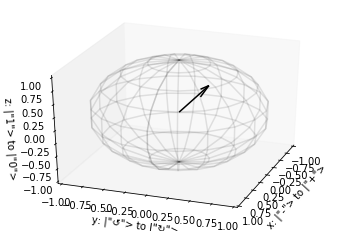

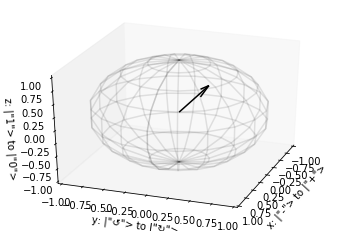

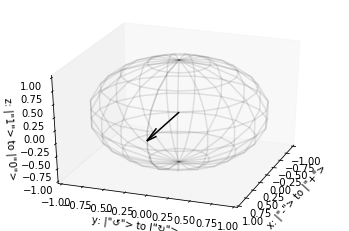

In [61]:
def zero_to_one_qubit_all(percentage_zero,percentage_one,which):
    if not percentage_zero+percentage_one==100 or percentage_zero<0 or percentage_one<0: raise Exception("percentages must add up to 100\% and both be positive ")
    qu = np.sqrt(percentage_zero/100.)*zero_qubit+np.sqrt(percentage_one/100.)*one_qubit
    if which == 2:
        qu.put(1,qu.item(1)*-1)
    if which == 3:
        qu.put(0,qu.item(0)*-1)
    if which == 4:
        qu = qu * -1
    return qu
for i in range(1,5):
    print(zero_to_one_qubit_all(50,50,i))
    plot_bloch(zero_to_one_qubit_all(50,50,i),color='xkcd:black')
    i = i




In [67]:
clockwise_plus_minus = 1/2*(1+np.complex(0,1))*plus_qubit + 1/2*(1-np.complex(0,1))*minus_qubit
print(clockwise_plus_minus)
print(clockwisearrow_qubit)

[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
